In [57]:
import pandas as pd
import os
import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import climetlab as cml

In [58]:
data_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/'
fcn_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/fourcastnet/init20220101-lead48-t00-fcn'
pangu_dir = '/Users/user/Documents_stuff/Ashoka/Capstone_Project/code/ai-models/data/forecast_data/pangu/init20220101-lead48-t00-pangu'

In [59]:
pangu0 = f"{pangu_dir}/out-pangu-0.grib"
pangu6 = f"{pangu_dir}/out-pangu-6.grib"
fcn0 = f"{fcn_dir}/out-fcn-0.grib"

In [60]:
ds = xr.load_dataset(fcn0, engine='cfgrib')
# ds = ds.sel(variable='2t')
# ds = ds.to_xarray()
ds

skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==131 shortName='u'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='

skipping variable: paramId==132 shortName='v'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([850., 500., 250.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  850.,  500.,  250.]))
skipping variable: paramId==129 shortName='z'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(


<xarray.Dataset> Size: 33MB
Dimensions:            (latitude: 721, longitude: 1440, isobaricInhPa: 3)
Coordinates:
    time               datetime64[ns] 8B 2022-01-01
    step               timedelta64[ns] 8B 00:00:00
    heightAboveGround  float64 8B 10.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         datetime64[ns] 8B 2022-01-01
    surface            float64 8B 0.0
    meanSea            float64 8B 0.0
  * isobaricInhPa      (isobaricInhPa) float64 24B 850.0 500.0 250.0
    entireAtmosphere   float64 8B 0.0
Data variables:
    u10                (latitude, longitude) float32 4MB 0.06749 ... 1.31
    v10                (latitude, longitude) float32 4MB 0.008652 ... -0.4396
    sp                 (latitude, longitude) float32 4MB 1.029e+05 ... 6.888e+04
    msl                (latitude, longitude) float32 4MB 1.029e+05 ... 9.931e+04
    t                  (isobaricInhPa, latitude, longitude) float32 12MB 254....
    tcwv               (latitude, longitude) float32 4MB 1.856 1.856 ... 1.01
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-02T13:28 GRIB to CDM+CF via cfgrib-0.9.1...

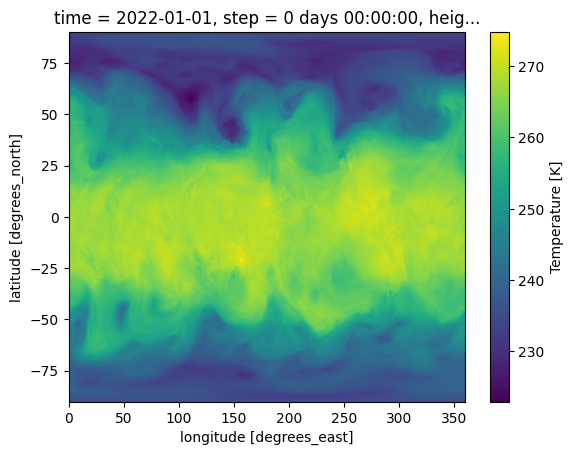

In [73]:
ds['t'].isel(isobaricInhPa=1).plot()

/Users/user/miniconda3/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


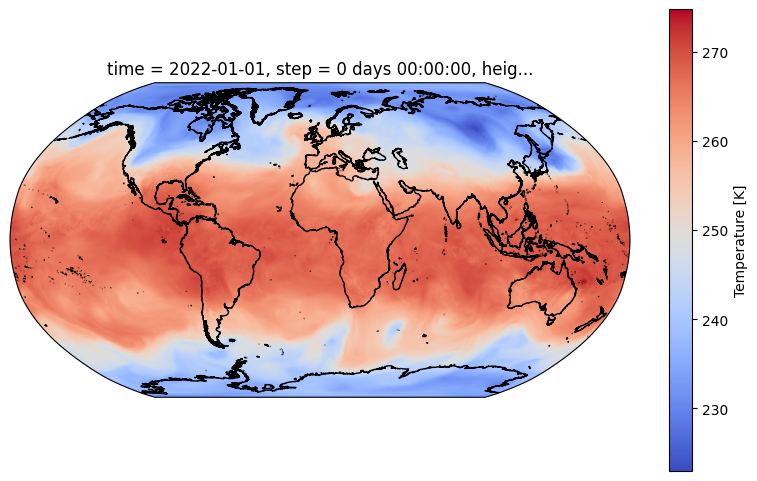

In [74]:
import cartopy.crs as ccrs
import cartopy

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution="10m")
plot = ds['t'].isel(isobaricInhPa=1).plot(
    cmap=plt.cm.coolwarm, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.6}
)

In [33]:
def convert(data_filename):
  data_nc = data_filename + '.nc'
  if not os.path.exists(data_nc):
    ds = cml.load_source("file", data_filename)
    ds = ds.sel(variable='2t')
    ds = ds.to_xarray()
    ds.to_netcdf(data_nc)
    del ds

  return xr.open_dataset(data_nc)

In [34]:
test_pangu = convert(pangu6)
test_pangu

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [47]:
test_fcn = convert(fcn0)
test_fcn

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [35]:
pangu_df = convert(pangu0)
for i in range(6, 50, 6):
    pangu_df_temp = convert(f"{pangu_dir}/out-pangu-{i}.grib")
    pangu_df = xr.concat([pangu_df, pangu_df_temp], dim="step")
    del pangu_df_temp
pangu_df
pangu_df.to_netcdf(f"{pangu_dir}/out-pangu-all.nc")

In [36]:
fcn_df = convert(fcn0)
for i in range(6, 50, 6):
    fcn_df_temp = convert(f"{fcn_dir}/out-FCN-{i}.grib")
    fcn_df = xr.concat([fcn_df, fcn_df_temp], dim="step")
    del fcn_df_temp
fcn_df
# save this to xarray file
fcn_df.to_netcdf(f"{fcn_dir}/out-FCN-all.nc")

In [42]:
import xarray as xr
import matplotlib.pyplot as plt

pangu_df = xr.open_dataset(f"{pangu_dir}/out-pangu-all.nc")
pangu_df
fcn_df = xr.open_dataset(f"{fcn_dir}/out-FCN-all.nc")
pangu_df

<xarray.Dataset> Size: 37MB
Dimensions:            (time: 1, step: 9, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 72B 0 days 00:00:00 ... 2 days ...
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 72B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 37MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:06 GRIB to CDM+CF via cfgrib-0.9.1...

In [43]:
def graph_india(dataset):
    lat_min, lat_max = 8.0, 37.0
    lon_min, lon_max = 68.0, 97.0


    indian_region = dataset.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max)
    )


    t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])


    plt.figure(figsize=(10, 6))
    t2m_avg.plot.line(
        x="valid_time", 
        marker="o", 
        linestyle='--', 
        label="Forecasted Temperature (K)", 
        color="blue"
    )

    plt.title("Forecasted Temperature Over Time for the Indian Region")
    plt.xlabel("Time")
    plt.ylabel("Temperature (K)")
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.clf()


def maps_india(dataset):
    lat_min, lat_max = 8.0, 37.0
    lon_min, lon_max = 68.0, 97.0


    indian_region = dataset.sel(
        latitude=slice(lat_max, lat_min),
        longitude=slice(lon_min, lon_max)
    )
    time_steps = indian_region.step.values
    for step in time_steps:
        plt.figure(figsize=(8, 6))
        indian_region_at_step = indian_region.sel(step=step)
        indian_region_at_step_mean = indian_region_at_step.t2m.mean(dim="heightAboveGround")
        mappable = indian_region_at_step_mean.plot(cmap="coolwarm")
        # convert step which is a numpy.timedelta thing, to hours from nanoseconds
        step = int(step.item() / 3.6e+12)

        plt.title(f"Forecasted Temperature (K) at +{step} hours")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.colorbar(mappable, label="Temperature (K)")
        plt.grid(True)
        plt.show()
    

In [ ]:
graph_india(pangu_df)
maps_india(pangu_df)


In [ ]:
graph_india(fcn_df)
maps_india(fcn_df)

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

# List of GRIB files
grib_files = [
    "out-pangu-0.grib", "out-pangu-6.grib", "out-pangu-12.grib",
    "out-pangu-18.grib", "out-pangu-30.grib", "out-pangu-36.grib",
    "out-pangu-42.grib", "out-pangu-48.grib"
]

# append pangu_dir to each file
grib_files = [f"{pangu_dir}/{file}" for file in grib_files]

# Combine datasets
datasets = []
for file in grib_files:
    ds = xr.open_dataset(file, engine="cfgrib")
    datasets.append(ds)

# Concatenate along the step dimension
combined = xr.concat(datasets, dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=2.0)
skipping variable: paramId==167 shortName='t2m'
Traceback (most recent call last):
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/user/miniconda3/lib/python3.9/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key

AttributeError: 'Dataset' object has no attribute 't2m'

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01

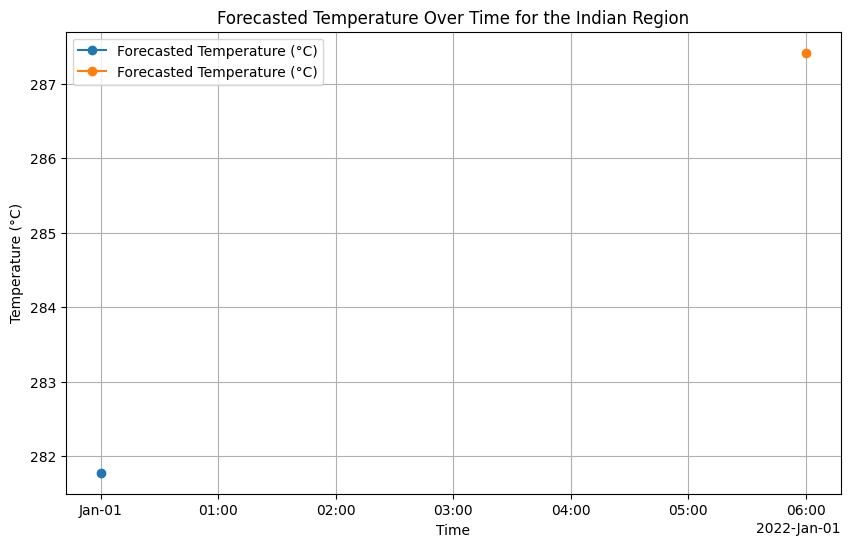

In [ ]:
import matplotlib.pyplot as plt

# Load the forecast datasets (replace with actual file paths or data sources)


# Combine the two datasets along the 'step' dimension
combined = xr.concat([pangu0_df, pangu6_df], dim="step")

# Define the bounding box for the Indian region
lat_min, lat_max = 8.0, 37.0
lon_min, lon_max = 68.0, 97.0

# Select data over the Indian region
indian_region = combined.sel(
    latitude=slice(lat_max, lat_min),  # Latitude values typically decrease
    longitude=slice(lon_min, lon_max)
)

# Average temperature over the Indian region
t2m_avg = indian_region.t2m.mean(dim=["latitude", "longitude", "heightAboveGround"])

# Plot the forecasted temperature over time
plt.figure(figsize=(10, 6))
t2m_avg.plot.line(x="valid_time", marker="o", label="Forecasted Temperature (°C)")

plt.title("Forecasted Temperature Over Time for the Indian Region")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
fcn0 = convert(f"{fcn_dir}/out-fcn-0.grib")
fcn0

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 00:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
fcn6 = convert(f"{fcn_dir}/out-fcn-6.grib")
fcn6

<xarray.Dataset> Size: 4MB
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 721,
                        longitude: 1440)
Coordinates:
  * time               (time) datetime64[ns] 8B 2022-01-01
  * step               (step) timedelta64[ns] 8B 06:00:00
  * heightAboveGround  (heightAboveGround) float64 8B 2.0
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (time, step) datetime64[ns] 8B ...
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-01T10:07 GRIB to CDM+CF via cfgrib-0.9.1...